In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

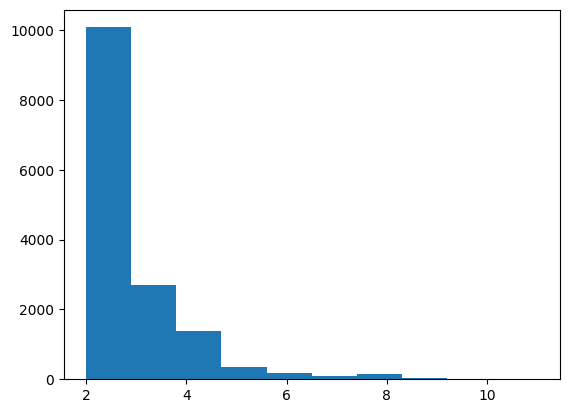

In [4]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [5]:
import numpy as np
from apyori import apriori

In [6]:
df = df.fillna(0)

In [7]:
trans = df.values.tolist()
trans[:5]

[[1808, '21-07-2015', 'tropical fruit'],
 [2552, '05-01-2015', 'whole milk'],
 [2300, '19-09-2015', 'pip fruit'],
 [1187, '12-12-2015', 'other vegetables'],
 [3037, '01-02-2015', 'whole milk']]

In [8]:
grouped = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)
transactions = grouped.tolist()

In [18]:
rules = list(apriori(transactions, 
                     min_support = 0.001, 
                     min_confidence = 0.1, 
                     min_lift = 1, 
                     min_length=1))

In [20]:
count = 0
for rule in rules:
    items = list(rule.items)
    support = rule.support
    for stat in rule.ordered_statistics:
        if stat.items_base and stat.items_add:
            print(f"rule.items= {items}")
            print(f"rule.support= {support}")
            print(f"\titems_base= {list(stat.items_base)}")
            print(f"\tlifted_item = {list(stat.items_add)}")
            print(f"\tlift= {stat.lift}")
            print(f"\tconfidence (i.e. cond prob {list(stat.items_add)} if {list(stat.items_base)})= {stat.confidence}\n")
            count += 1
            if count >= 10:
                break
    if count >= 10:
        break

rule.items= ['other vegetables', 'berries']
rule.support= 0.0026732607097507185
	items_base= ['berries']
	lifted_item = ['other vegetables']
	lift= 1.0048992447977005
	confidence (i.e. cond prob ['other vegetables'] if ['berries'])= 0.12269938650306748

rule.items= ['beverages', 'soda']
rule.support= 0.001871282496825503
	items_base= ['beverages']
	lifted_item = ['soda']
	lift= 1.1626778855760054
	confidence (i.e. cond prob ['soda'] if ['beverages'])= 0.11290322580645162

rule.items= ['yogurt', 'chewing gum']
rule.support= 0.001403461872619127
	items_base= ['chewing gum']
	lifted_item = ['yogurt']
	lift= 1.358508430609598
	confidence (i.e. cond prob ['yogurt'] if ['chewing gum'])= 0.11666666666666667

rule.items= ['rolls/buns', 'chocolate']
rule.support= 0.002806923745238254
	items_base= ['chocolate']
	lifted_item = ['rolls/buns']
	lift= 1.081591909651348
	confidence (i.e. cond prob ['rolls/buns'] if ['chocolate'])= 0.11898016997167138

rule.items= ['detergent', 'rolls/buns']
rule.supp